In [39]:
import PIL
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers,Sequential
import numpy as np
from matplotlib import pyplot as plt
import cv2

In [8]:
filePath = '.\Datasets\satellite\data'

In [9]:
import pathlib

data_dir = pathlib.Path(filePath)
data_dir

WindowsPath('Datasets/satellite/data')

In [10]:
imgCnt = len(list(data_dir.glob('*/*.jpg')))
imgCnt

5631

In [15]:
waters = list(data_dir.glob('water/*'))
waters[0]

WindowsPath('Datasets/satellite/data/water/SeaLake_1.jpg')

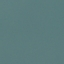

In [17]:
PIL.Image.open(waters[4])

In [19]:
cloud = list(data_dir.glob('cloudy/*'))
cloud[0]

WindowsPath('Datasets/satellite/data/cloudy/train_10021.jpg')

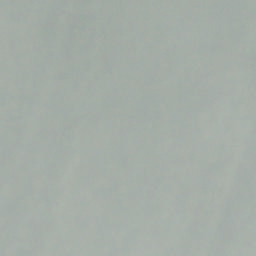

In [24]:
img = PIL.Image.open(cloud[1]).convert("RGB")
img

In [25]:
satellite_img_dict = {
    'cloudy': list(data_dir.glob('cloudy/*')),
    'desert': list(data_dir.glob('desert/*')),
    'green_area': list(data_dir.glob('green_area/*')),
    'water': list(data_dir.glob('water/*')),
}

In [26]:
satellite_img_labels = {
    'cloudy': 0,
    'desert': 1,
    'green_area': 2,
    'water': 3
}

In [36]:
img = PIL.Image.open(satellite_img_dict['cloudy'][0]).convert("RGB")

In [41]:
X,y=[],[]

for img_name,images in satellite_img_dict.items():
    for image in images:
        img = PIL.Image.open(image).convert('RGB')
        img = np.array(img)
        resized_img = cv2.resize(img,(180,180))
        X.append(resized_img)
        y.append(satellite_img_labels[img_name])

In [43]:
X = np.array(X)
y = np.array(y)

In [44]:
X.shape

(5631, 180, 180, 3)

In [45]:
X = X/255

In [46]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=0)

In [47]:
num_classes = 4
model = Sequential([
    #cnn
    layers.Conv2D(16,3,padding='same',activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32,3,padding='same',activation='relu'),
    layers.MaxPooling2D(),
    #ann
    layers.Flatten(),
    layers.Dense(num_classes)    
])

In [48]:
model.compile(
    optimizer='adam',
    loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']
)

In [51]:
model.fit(X_train,y_train,epochs=10)

Epoch 1/10
132/132 ━━━━━━━━━━━━━━━━━━━━ 32s 234ms/step - accuracy: 0.8769 - loss: 0.2908
Epoch 2/10
132/132 ━━━━━━━━━━━━━━━━━━━━ 32s 238ms/step - accuracy: 0.8893 - loss: 0.2612
Epoch 3/10
132/132 ━━━━━━━━━━━━━━━━━━━━ 31s 234ms/step - accuracy: 0.8901 - loss: 0.2835
Epoch 4/10
132/132 ━━━━━━━━━━━━━━━━━━━━ 31s 234ms/step - accuracy: 0.8991 - loss: 0.2589
Epoch 5/10
132/132 ━━━━━━━━━━━━━━━━━━━━ 31s 236ms/step - accuracy: 0.8980 - loss: 0.2561
Epoch 6/10
132/132 ━━━━━━━━━━━━━━━━━━━━ 31s 237ms/step - accuracy: 0.9086 - loss: 0.2362
Epoch 7/10
132/132 ━━━━━━━━━━━━━━━━━━━━ 31s 232ms/step - accuracy: 0.8875 - loss: 0.2676
Epoch 8/10
132/132 ━━━━━━━━━━━━━━━━━━━━ 31s 232ms/step - accuracy: 0.9003 - loss: 0.2367
Epoch 9/10
132/132 ━━━━━━━━━━━━━━━━━━━━ 31s 233ms/step - accuracy: 0.9101 - loss: 0.2262
Epoch 10/10
132/132 ━━━━━━━━━━━━━━━━━━━━ 31s 233ms/step - accuracy: 0.8934 - loss: 0.2554


In [54]:
predictions = model.predict(np.array([X_test[0]]))
predictions

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 374ms/step


array([[  5.185526 ,  -1.3257129, -20.509237 ,  -2.239077 ]],
      dtype=float32)

In [58]:
predictions = np.argmax(predictions)
predictions

0

In [59]:
y_test[0]

0

In [60]:
model.evaluate(X_test,y_test)

44/44 ━━━━━━━━━━━━━━━━━━━━ 4s 79ms/step - accuracy: 0.9016 - loss: 0.2359


[0.26902705430984497, 0.890625]

In [61]:
testImg = './Datasets/cloud.jpeg'

In [64]:
testImg = PIL.Image.open(testImg).convert('RGB')
test = np.array(testImg)

In [65]:
test = cv2.resize(test,(180,180))

In [69]:
predicted = model.predict(np.array([test]))
predicted_index = np.argmax(predicted)
predicted_index

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


0

In [77]:
testImg2 = './Datasets/desert.jpg'
testImg2 = PIL.Image.open(testImg2).convert('RGB')
test2 = np.array(testImg2)
test2 = cv2.resize(test2,(180,180))

In [78]:
predicted = model.predict(np.array([test2]))
predicted_index = np.argmax(predicted)
predicted_index

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


1